<a href="https://colab.research.google.com/github/693080593/research/blob/master/Feed_Type_(Blank)_Stratified_Test_Set_Multi_split_041521_%5B3%5D_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Type Effect on Biocrude 041521 Stratified Test.csv')
Original_Oil_Yields = data['Bio-crude Oil Yield']
Original_Features = data.drop(['Algae', 'Manure', 'Lignocellulosic Biomass', 'Model Compounds', 'Food Waste', 'Sludge', 'Municipal Solid Waste', 'Bioethanol Residue', 'Plant Seed','Bio-crude Oil Yield'], axis = 1)

data_figure = data.drop(['Algae', 'Manure', 'Lignocellulosic Biomass', 'Model Compounds', 'Food Waste', 'Sludge', 'Municipal Solid Waste', 'Bioethanol Residue', 'Plant Seed','Group'], axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data_figure.shape))
data_figure.shape

data_figure[:517:11]


Bio-crude dataset has 521 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
0,100.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,98.500000
11,72.400000,12.900000,0.00000,0.00000,11.600000,0.000000,3.100000,74.800000
22,0.000000,0.000000,39.50000,20.60000,0.000000,30.200000,1.500000,63.200000
33,33.000000,33.000000,16.50000,16.50000,0.000000,0.000000,0.000000,58.100000
44,19.700000,13.500000,0.00000,0.00000,22.900000,0.000000,7.300000,54.300000
55,50.000000,0.000000,0.00000,0.00000,50.000000,0.000000,0.000000,50.100000
66,53.000000,11.000000,0.00000,0.00000,29.000000,0.000000,7.000000,48.000000
77,12.620000,28.110000,0.00000,0.00000,26.470000,0.000000,6.220000,45.500000
88,14.000000,59.000000,0.00000,0.00000,20.000000,0.000000,3.000000,43.700000
99,35.520000,43.810000,0.00000,0.00000,15.700000,0.000000,4.500000,42.600000


In [ ]:
# MinMaxScale
#from sklearn.preprocessing import MinMaxScaler
#from pandas import DataFrame

#data_MinMax = data2.drop(['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash','Bio-crude Oil Yield','Group'], axis = 1)

#scaler = MinMaxScaler()

#print(scaler.fit(data_MinMax))

#print(scaler.data_max_)
#print(scaler.data_min_)

#data_MinMax3 = scaler.transform(data_MinMax)

#data_MinMax2 = pd.DataFrame(data = data_MinMax3*100,  columns =["Temperature"])

#print(data_MinMax2)

#Original_Features = pd.concat([data2['Lipid'],data2['Protein'],data2['Cellulose'],data2['Hemicellulose'],data2['Carbohydrate'],data2['Lignin'],data2['Ash'],data_MinMax2, data2['Group']], axis=1)

#data=pd.concat([Original_Features, data2['Bio-crude Oil Yield']], axis=1)

#data_figure_new=data.drop('Group', axis = 1)

#data[:517:11]

#Original_Features[:511:11]

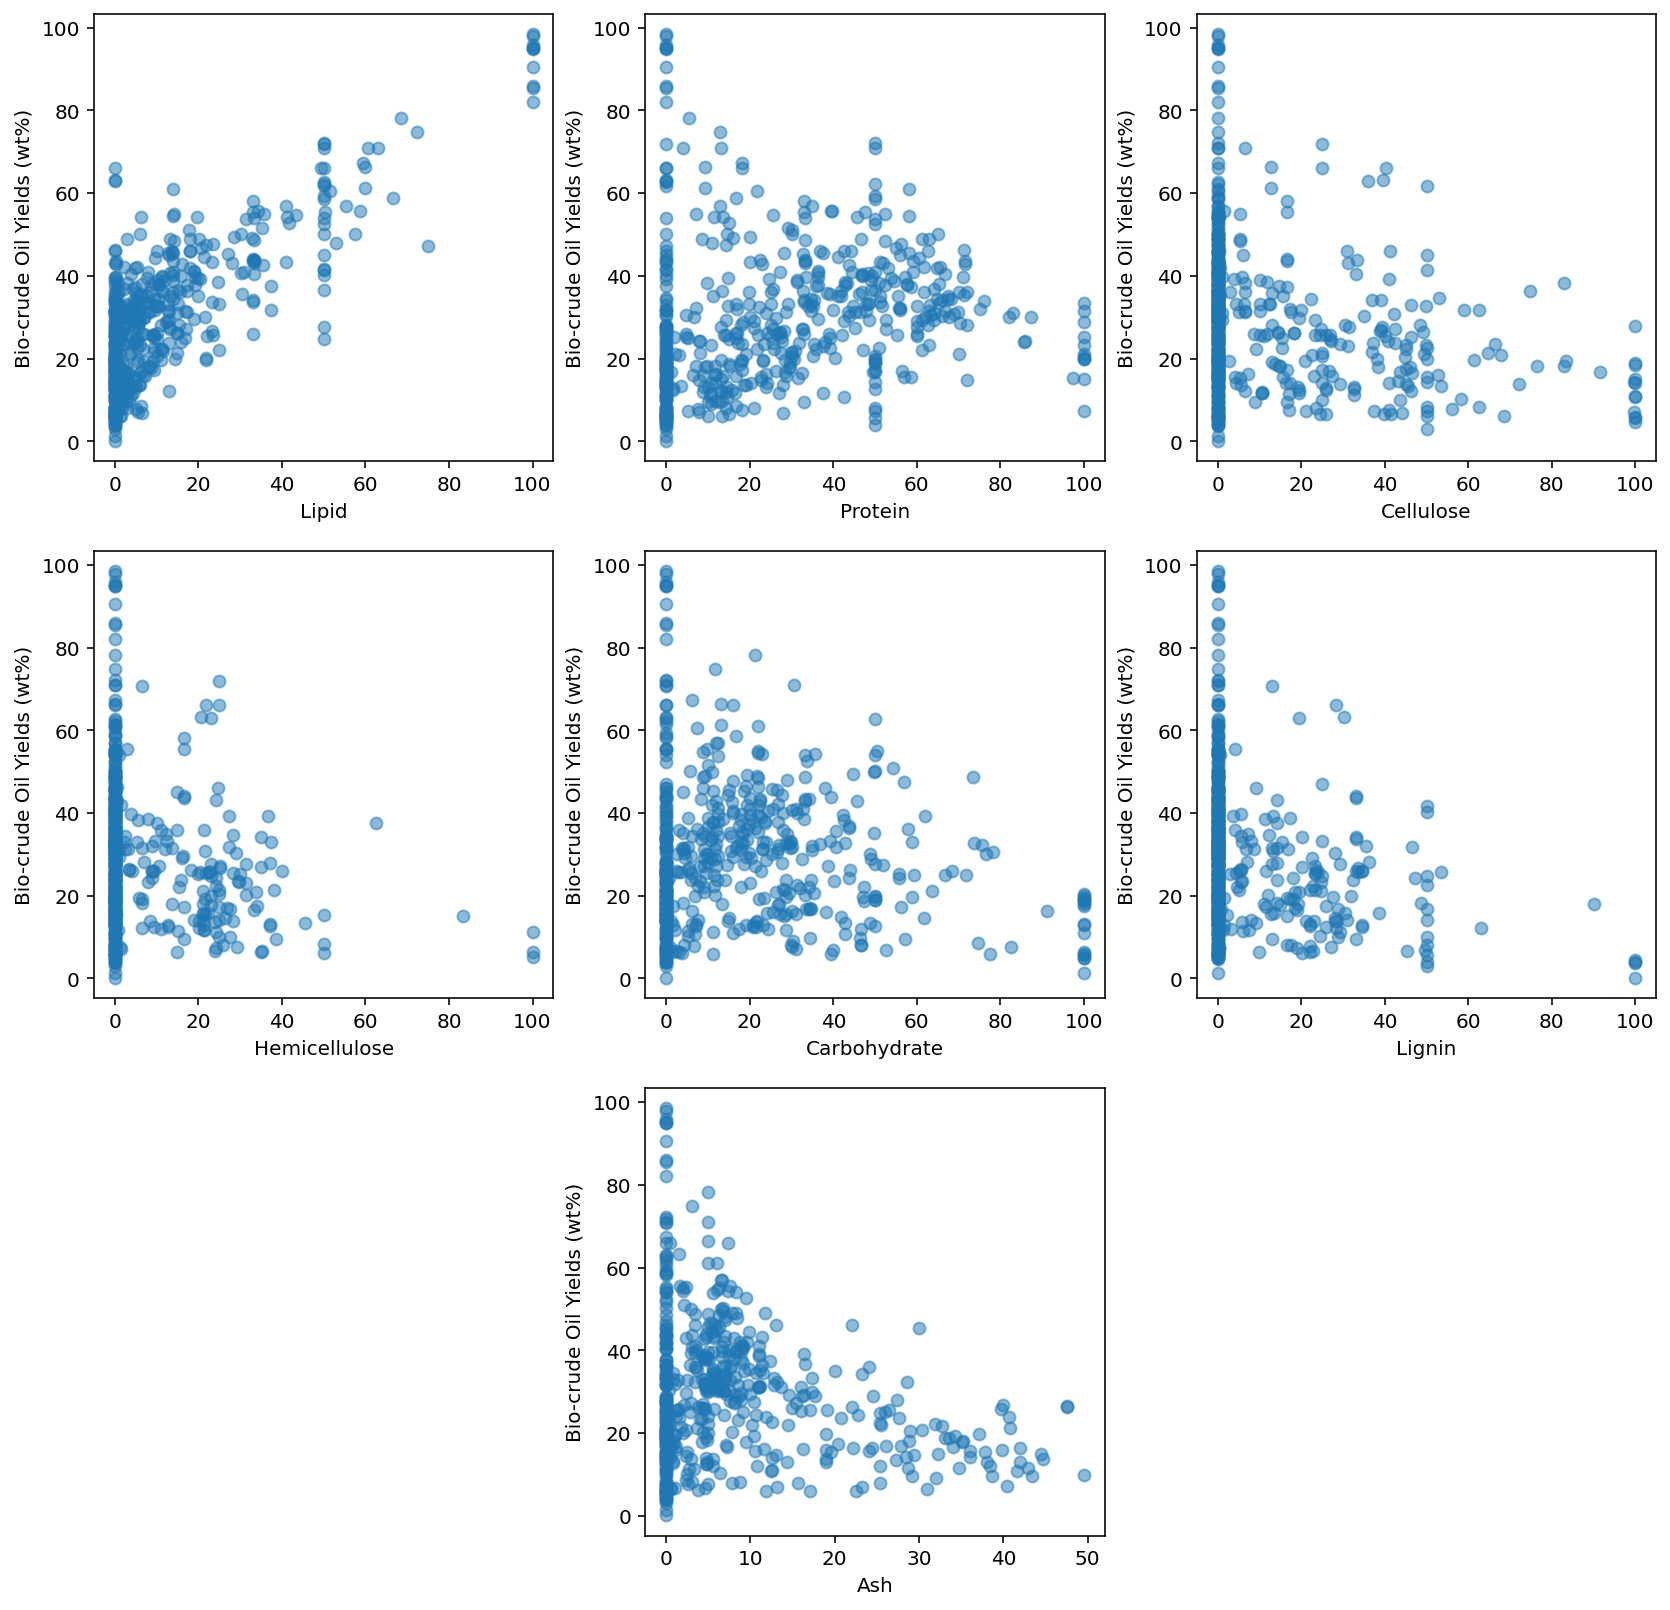

In [ ]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(14,14))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Protein'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Ash'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()


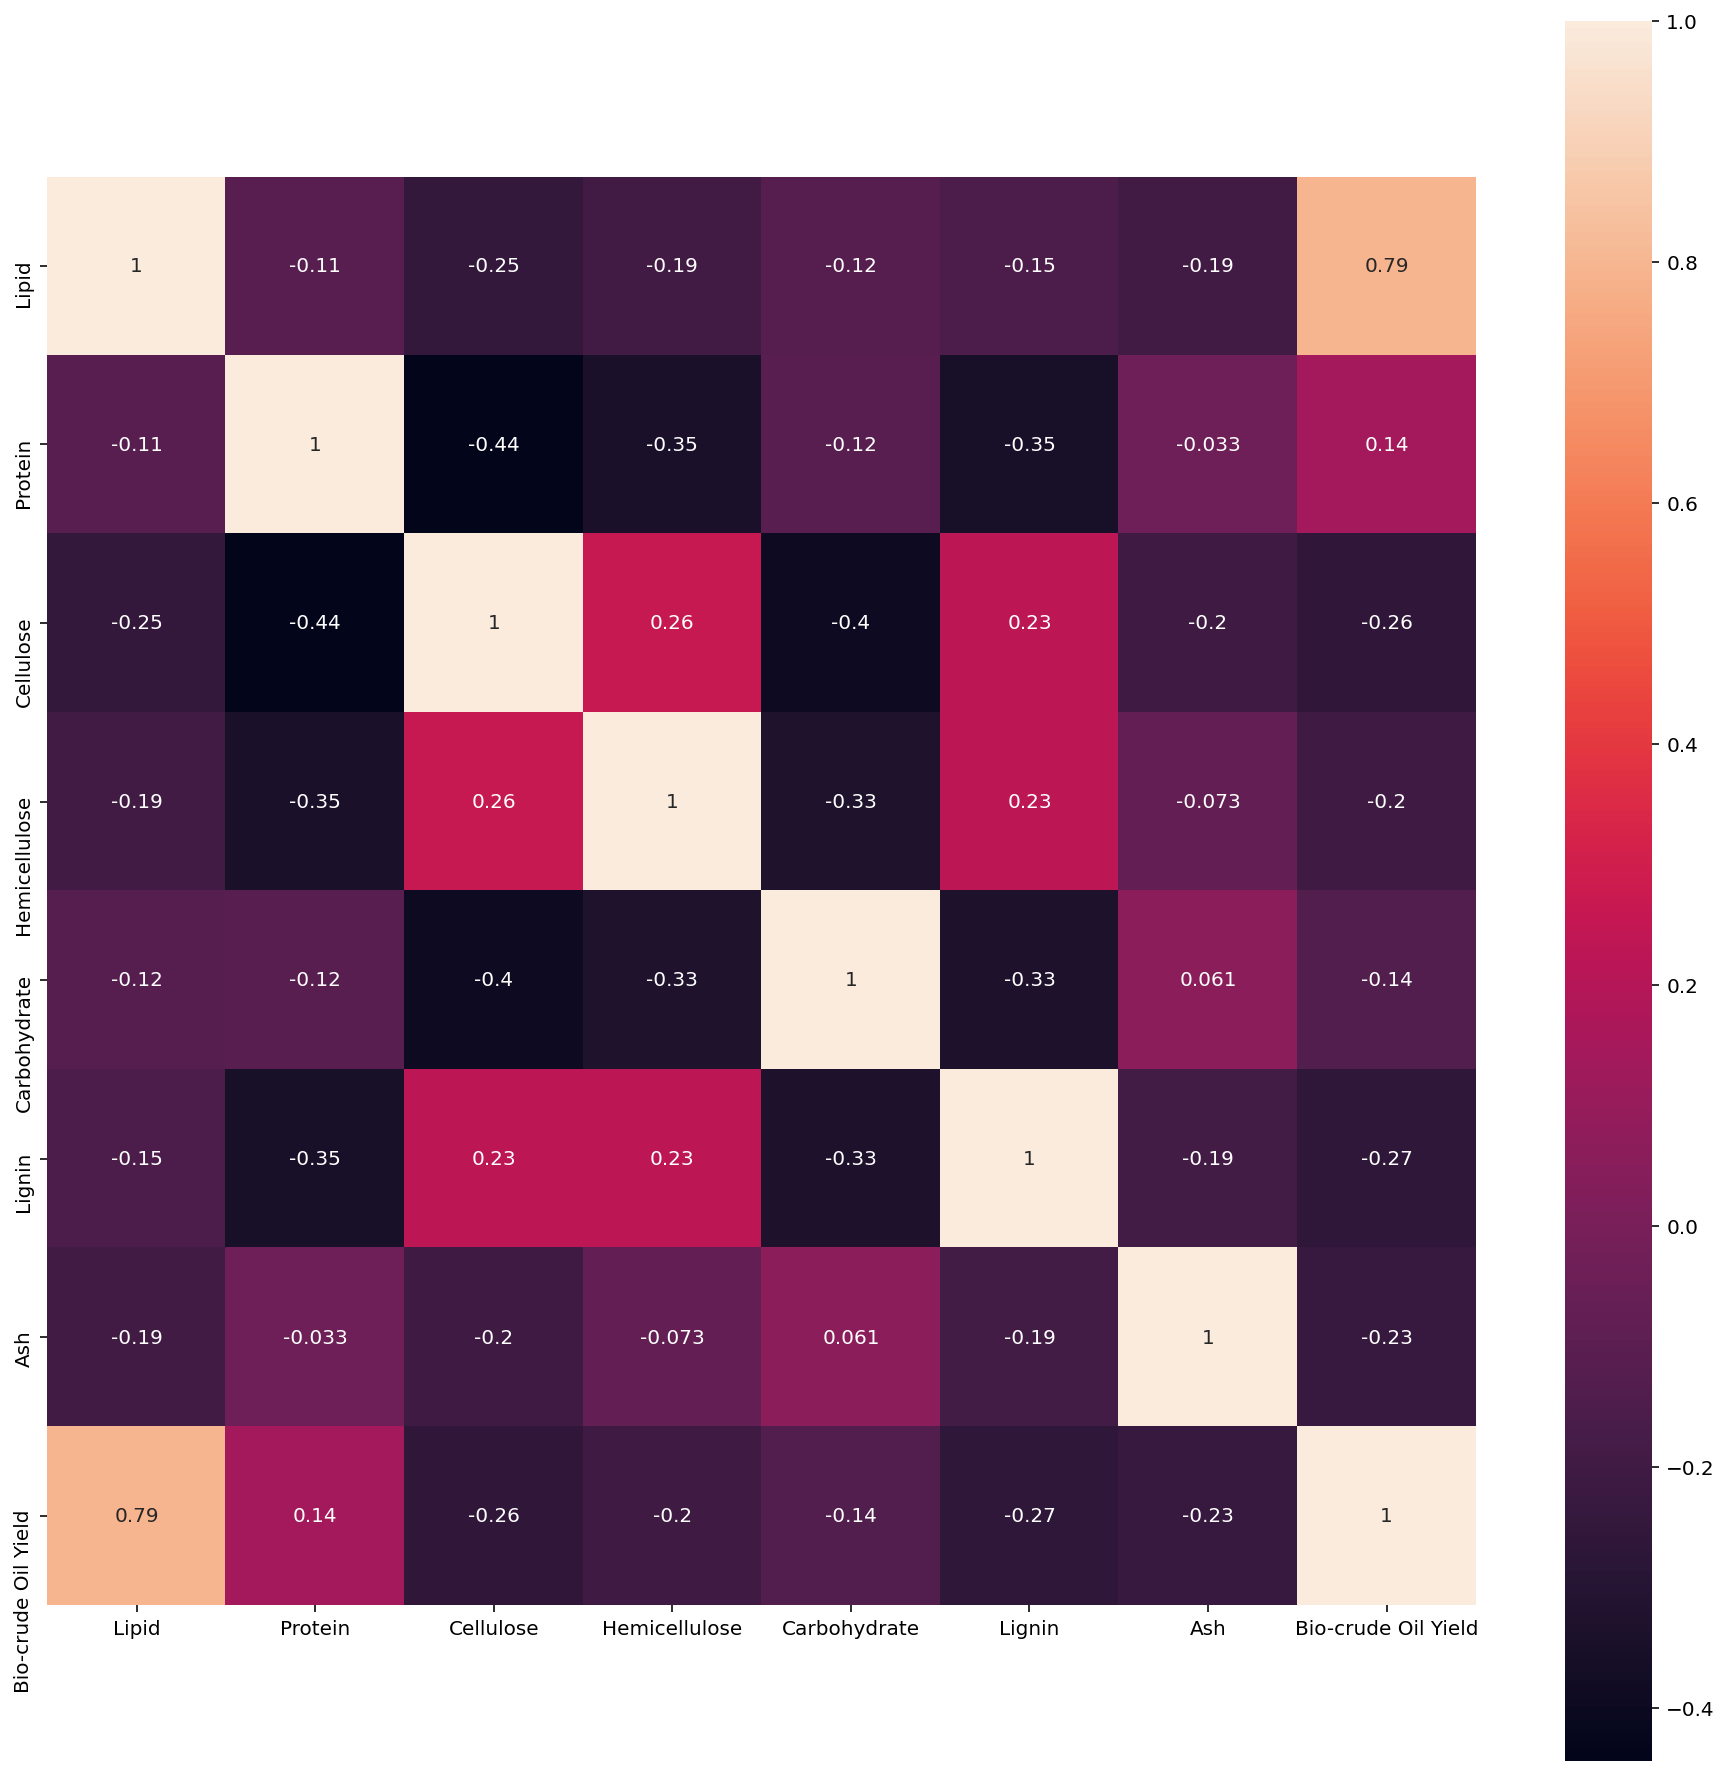

In [ ]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(16,16))
sns.heatmap(data_figure.corr(),vmax=1,square=True,annot=True)
plt.show()

In [2]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [ ]:
# No use.
for i in range(0,201,1):
  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'Stratified KFold'
  from sklearn.model_selection import StratifiedKFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=i)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  df = pd.concat([Features, Oil_Yields], axis=1)
  
  # Lets split the data into 10 folds. 
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=26)
  
  group = df.loc[:,'Group']
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  MRE_train_all=[]
  MRE_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for train_index, test_index in skf.split(df, group):
    
    train = df.iloc[train_index,:]
    test = df.iloc[test_index,:]
    
    X_train=train.drop(['Bio-crude Oil Yield','Group'], axis=1)
    y_train=train['Bio-crude Oil Yield']
    
    X_test=test.drop(['Bio-crude Oil Yield','Group'], axis=1)
    y_test=test['Bio-crude Oil Yield']

    model = RandomForestRegressor()

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    
  # Predict validation set
  y_valid_predict = model.predict(X_valid_new)
  
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  MRE_valid = performance_metric(y_valid, y_valid_predict)

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Difference Values of R2 of training and test sets", np.mean(r2_train_all)-np.mean(r2_test_all))
  print("Values of R2 of test set", r2_test_all)
  print("Difference Values of R2 Max and Min of test set", max(r2_test_all)-min(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print("")
  #print("Mean value of MRE of training set", np.mean(MRE_train_all))
  #print("Mean value of MRE of test set", np.mean(MRE_test_all))
  #print("Difference Values of MRE of training and test sets", np.mean(MRE_train_all)-np.mean(MRE_test_all))
  #print("Values of MRE of test set", MRE_test_all)
  #print("Difference Values of MRE Max and Min of test set", max(MRE_test_all)-min(MRE_test_all))
  #print("Optimal model has MRE of valid set:", MRE_valid)

In [ ]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

group2 = Original_Features.loc[:,'Group']

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.1, stratify=group2, random_state=62)

X_valid_new=X_valid.drop('Group', axis=1)

Features_new=Features.drop('Group', axis=1)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for i in range(5000,6000,10):

  X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)
    
  model = RandomForestRegressor(random_state=33)
  model.fit(X_train, y_train)
    
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)

  MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
  MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
  y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
  y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
  r2_train = metrics.r2_score(y_train, y_train_predict)
  r2_test = metrics.r2_score(y_test, y_test_predict)

  MRE_train = performance_metric(y_train, y_train_predict)
  MRE_test = performance_metric(y_test, y_test_predict)

  cnt += 1
  MAE_train_all.append(MAE_train)
  MAE_test_all.append(MAE_test)
  y_train_rmse_all.append(y_train_rmse)
  y_test_rmse_all.append(y_test_rmse)
  r2_train_all.append(r2_train)
  r2_test_all.append(r2_test)
  MRE_train_all.append(MRE_train)
  MRE_test_all.append(MRE_test)
  y_test_list.append(y_test.values)
  y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
model.fit(Features_new, Oil_Yields)

y_valid_predict = model.predict(X_valid_new)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of MAE of training set 3.0753165883719698
Standard deviation of MAE of training set 0.08310607222879912
Mean value of MAE of test set 6.854026147917463
Standard deviation of MAE of test set 0.5550108946707367

Mean value of RMSE of training set 4.150566510909918
Standard deviation of RMSE of training set 0.11530278356803135
Mean value of RMSE of test set 9.074526028659324
Standard deviation of RMSE of test set 0.8649462582718453

Mean value of R2 of training set 0.9435676637716974
Standard deviation of R2 of training set 0.003819361139557444
Mean value of R2 of test set 0.7179935462934038
Standard deviation of R2 of test set 0.07295882464036686

Mean value of MRE of training set 0.10343652972066565
Standard deviation of MRE of training set 0.00321114832939403
Mean value of MRE of test set 0.23218211036408834
Standard deviation of MRE of test set 0.02372158080113974

Optimal model has MAE of valid set: 6.665584192483832
Optimal model has RMSE of valid set: 8.65596392382186
Op

Text(0.5, 1.0, 'y_pred vs. y_true')

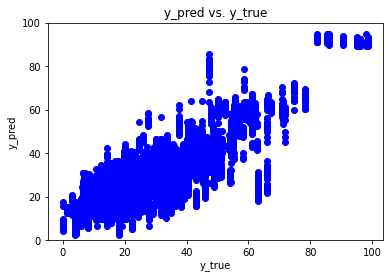

In [ ]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RFR.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

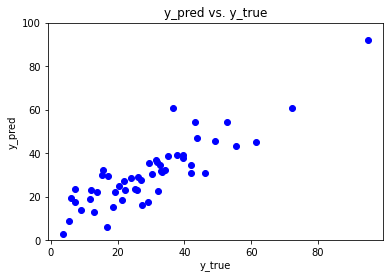

In [ ]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
# n_estimators 参数的最佳取值(10, 200, 11)

for j in range(10, 200, 10):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':j,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# max_depth 参数的最佳取值(1, 20, 1)

for j in range(1, 20, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':120,'max_depth':j,'min_samples_leaf':1,'min_samples_split':2,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# min_samples_leaf 参数的最佳取值(1, 3, 1)

for j in range(1, 3, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':120,'max_depth':13,'min_samples_leaf':j,'min_samples_split':2,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# min_samples_split 参数的最佳取值(2, 5, 20)

for j in range(2, 5, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':120,'max_depth':13,'min_samples_leaf':1,'min_samples_split':j,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# max_features 参数的最佳取值(1, 8, 1)

for j in range(1, 8, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':120,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':j,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# random_state 参数的最佳取值(1, 201, 1)

for i in range(1, 201, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':120,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':2,'random_state':j}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [3]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

group2 = Original_Features.loc[:,'Group']

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.1, stratify=group2, random_state=62)

X_valid_new=X_valid.drop('Group', axis=1)

Features_new=Features.drop('Group', axis=1)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for i in range(5000,6000,10):

  X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)
  
  params = {'n_estimators':120,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':2,'random_state':33}

  model = RandomForestRegressor(**params)

  model.fit(X_train, y_train)
    
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)

  MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
  MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
  y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
  y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
  r2_train = metrics.r2_score(y_train, y_train_predict)
  r2_test = metrics.r2_score(y_test, y_test_predict)

  MRE_train = performance_metric(y_train, y_train_predict)
  MRE_test = performance_metric(y_test, y_test_predict)

  cnt += 1
  MAE_train_all.append(MAE_train)
  MAE_test_all.append(MAE_test)
  y_train_rmse_all.append(y_train_rmse)
  y_test_rmse_all.append(y_test_rmse)
  r2_train_all.append(r2_train)
  r2_test_all.append(r2_test)
  MRE_train_all.append(MRE_train)
  MRE_test_all.append(MRE_test)
  y_test_list.append(y_test.values)
  y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
model.fit(Features_new, Oil_Yields)

y_valid_predict = model.predict(X_valid_new)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of MAE of training set 3.237600135644653
Standard deviation of MAE of training set 0.09451148072900199
Mean value of MAE of test set 6.868815351535536
Standard deviation of MAE of test set 0.5503826536566871

Mean value of RMSE of training set 4.375150954610846
Standard deviation of RMSE of training set 0.1382075471789491
Mean value of RMSE of test set 9.069693696371486
Standard deviation of RMSE of test set 0.7607011110093923

Mean value of R2 of training set 0.9369057756527974
Standard deviation of R2 of training set 0.004622996955041955
Mean value of R2 of test set 0.7169795513820126
Standard deviation of R2 of test set 0.06431303258467475

Mean value of MRE of training set 0.10827522677377178
Standard deviation of MRE of training set 0.0032375074867151154
Mean value of MRE of test set 0.230613334956175
Standard deviation of MRE of test set 0.021853666724655746

Optimal model has MAE of valid set: 6.122244865906959
Optimal model has RMSE of valid set: 7.294343323474419
Op

Text(0.5, 1.0, 'y_pred vs. y_true')

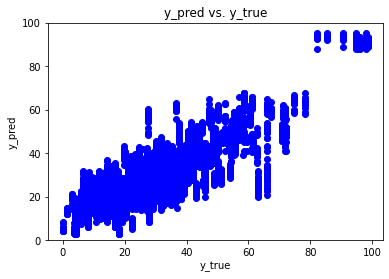

In [4]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RFR_opt.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

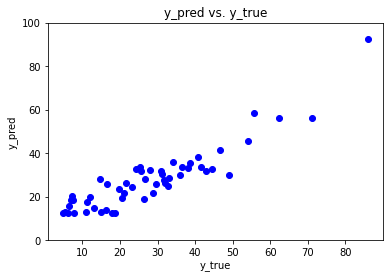

In [5]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_valid_predict,'Test Data':y_valid}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_test_set_RFR_opt.csv', index = False, header=True)

 1) Lipid                          0.480520
 2) Ash                            0.112854
 3) Protein                        0.109060
 4) Carbohydrate                   0.095470
 5) Lignin                         0.082683
 6) Cellulose                      0.079325
 7) Hemicellulose                  0.040089


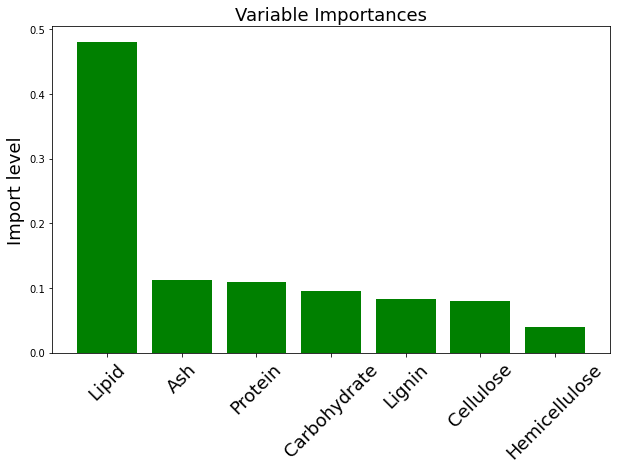

In [7]:
import matplotlib.pyplot as plt

Features = Original_Features.drop('Group', axis=1)

Features.columns = ['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash']
feat_labels = Features.columns[0:]

# get importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

x_columns = Features.columns[0:]
x_columns_indices = []

# summarize feature importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])

# plot feature importance
fig = plt.figure(figsize=(10, 6))
plt.title("Variable Importances", fontsize=18)
plt.ylabel("Import level", fontsize=18, rotation=90)

for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='green', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=45, fontsize=18)
plt.show()

fig.savefig('Biocrude Yield RF Variable Importances.png')